# Assignment 2: Support Vector Machines



In [63]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import bonnerlib
import pandas as pd

# Helper Functions

The next cell contains helper functions that will be used in answering the questions.

**generateLogSpread(central_value, lower_range, upper_range, num_points)**   
wrapper for **numpy.logspace** that generates an array of **num_points** values evenly spaced on a log scale, centered on **central_value** and extending **lower_range** below the central value and **upper_range** above the central value.

**gridSearch(trainSet, testSet, gamma_vals, c_vals)**   
performs an exhaustive grid search on the values in the **gamma_vals** and **c_vals** arrays and logs their performance. Returns a pandas dataset of the results. To do this:
```
for each set of gamma,C:
    create and train an svm usng the provided training data
    calculate and save the error using the test set
return the set of gamma,C, and their respect scores
```

**trainAndGetError(trainSet, testSet, clf)**   
trains an svm on **trainSet** and then tests it using **testSet**, returning its test error


In [62]:
# create helper function to generate value spreads
def generateLogSpread(central_value, lower_range, upper_range, num_points):
    return np.logspace(central_value - lower_range, central_value + upper_range, num=num_points)

# create exhaustive grid search helper
def gridSearch(trainSet, testSet, gamma_vals, c_vals):
    gridResults = {'Gamma': [],
                   'LogGamma': [],
                   'C':[],
                   'LogC': [],
                   'Training Error': [],
                   'Test Error': []}
    for gam in gamma_vals:
        for c in c_vals:
            # create classifier
            clf = SVC(gamma=gam, C=c)
            
            # log stats
            gridResults['Gamma'].append(gam)
            gridResults['LogGamma'].append(np.log10(gam))
            gridResults['C'].append(c)
            gridResults['LogC'].append(np.log10(c))
            # train and test
            errorResults = generateAndGetError(trainSet, testSet, clf)
            # log remaining stats
            gridResults['Training Error'].append(errorResults[0])
            gridResults['Test Error'].append(errorResults[1])
    return pd.DataFrame.from_dict(gridResults)

# create svm trainer and scorer
def generateAndGetError(trainSet, testSet, clf):
    xtrain,ytrain = trainSet
    xtest,ytest = testSet
    clf.fit(xtrain,ytrain)
    return [1 - clf.score(xtrain,ytrain), 1 - clf.score(xtest, ytest)]
            

# Part I

Generate two random samples of Moons data, a training set with 200 points
and a testset with 2000 points. Both setsshould have a noise level of 0.4 (so
that the two moon classes overlap significantly). Use these two data sets
throughout the rest of this question. In the questions below, you will be
evaluating the training error and the test error of an SVM. The training error
is the error on the training data, and the test error is the error on the test
data.

In [45]:
# training set
trainSet = datasets.make_moons(n_samples=200, noise=0.4)
xtrain,ytrain = trainSet
# test set
testSet = datasets.make_moons(n_samples=2000, noise=0.4)
xtest,ytest = testSet

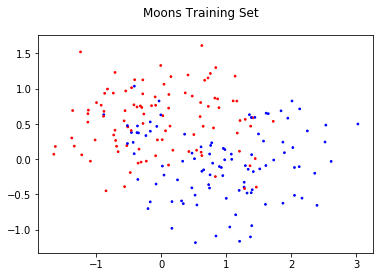

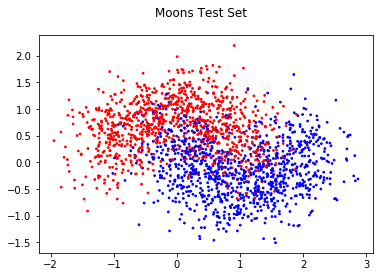

In [46]:
# visualize training and data sets
plt.figure()
plt.suptitle('Moons Training Set')
colors = np.array(['r','b'])
plt.scatter(xtrain[:,0],xtrain[:,1], color=colors[ytrain], s=3)
plt.figure()
plt.suptitle('Moons Test Set')
colors = np.array(['r','b'])
plt.scatter(xtest[:,0],xtest[:,1], color=colors[ytest], s=3)

# Part II

A soft-margin SVM with an RBF kernel requires two parameters, C and γ. Write
a Python program that carries out an exhaustive grid search for the best values of
these parameters. (Do not use Scikit-learn’s build-in grid-search facility.) You
should consider values of C and γ spread over several orders of magnitude. Choose
them so that the values of log C are equally spaced, and likewise for log γ. You
should use at least five values per order-of-magnitude (i.e., per factor-of-ten).
(You may find the function numpy.linspace useful.) For each combination of
values of C and γ, fit an SVM to the training data and evaluate its test error. Save
the combination of C and γ that gives the lowest test error. Call these values C0
and γ0. Report these values as well as the test error. Generate and hand in a
contour plot of the decision function with the decision boundary and margins
highlighted

## Process

```
Generate a spread of gamma and C values evenly spaced on the log scale
Perform an exhaustive grid search on the provided values to generate a dataset of scores
Report the best performing values and their test error
Generate a contour plot of the decision function highlighting decision boundary and margins
```

## Assumptions

1. Based on the example graphs given in the assignment description, the range for both *log(gamma)* and *log(C)* will be betweeen -4 and 3. With 6 points per decade and an end point, this gives 43 total points

2. Based on the example graphs, contours will be plotted against the training set, not test set

In [47]:
# generate spread of gamma and C
gamma_vals_pII = generateLogSpread(0, 4, 3, 43)
# c spread is the same
c_vals_pII = gamma_vals_pII

# print and verify data
#print(gamma_vals_pII)

In [48]:
# perform grid search
gridData_pII = gridSearch(trainSet, testSet, gamma_vals_pII, c_vals_pII)

In [49]:
# get best performing set
bestSet = gridData_pII.loc[gridData['Test Error'].idxmin()]
c0 = bestSet.loc['C']
gamma0 = bestSet.loc['Gamma']
error0 = bestSet.loc['Test Error']

# print and see results
print('The best performing values of C and Gamma based on an exhaustive',
      'grid search is:\n','c0: ',c0,'\ngamma0: ',gamma0)
print('\nThese values produced a test error of: ', error0)

The best performing values of C and Gamma based on an exhaustive grid search is:
 c0:  6.812920690579608 
gamma0:  4.641588833612772

These values produced a test error of:  0.1795


In [50]:
# view data stats to make sure everything looks right
#gridData_pII.describe()

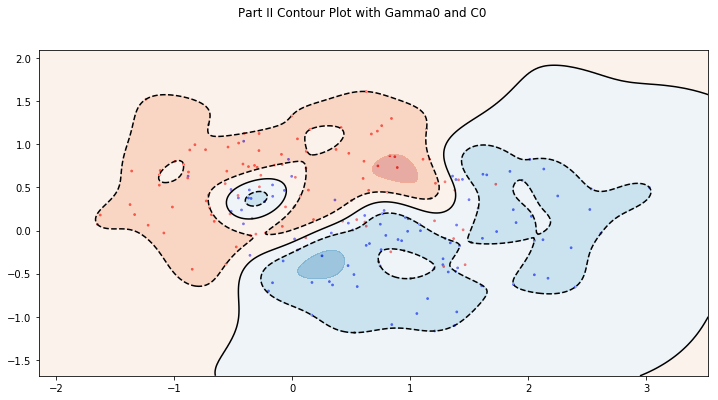

In [88]:
#remake svm and generate contour plot
clf = SVC(gamma=gamma0, C=c0)
clf.fit(xtrain,ytrain)

fig_pII= plt.figure(figsize=(12,6))
bonnerlib.dfContour(clf, trainSet, margins=1)
fig_pII.suptitle('Part II Contour Plot with Gamma0 and C0')
fig_pII.savefig('Part_II_Contour_Plot.png')

# Part III

In this question you will fix the value of γ and vary the value of C. Generate
two curves, one of test error vs log(C), and one of training error vs log(C).
Use γ = γ0, and use 100 different values of log(C) equally spaced between
log(C0) − 3 and log(C0) + 3. For each value of C you will have to retrain and
retest the SVM. Plot both curves on one set of axes, using blue for the training
error and green for the test error. You should find that the training error tends
to decrease as C increases, and that the test error first tends to decrease and
then increase, with its minimum very near C0. Provide an intuitive
explanation of this behavior.

## Process
```
Generate a spread of C about c0
Perform an exhautive grid search (with gamma only having a single value) to generate score data
Plot test error vs log(C) and training error vs log(C)
Discuss Results
```



In [18]:
# generate spread of C values
c_vals_pIII = generateLogSpread(np.log10(c0), 3, 3, 100)

#print and verify data
#print(c_vals_pIII)

In [19]:
# perform search and produce stats
gridData_pIII = gridSearch(trainSet, testSet, [gamma0], c_vals_pIII)

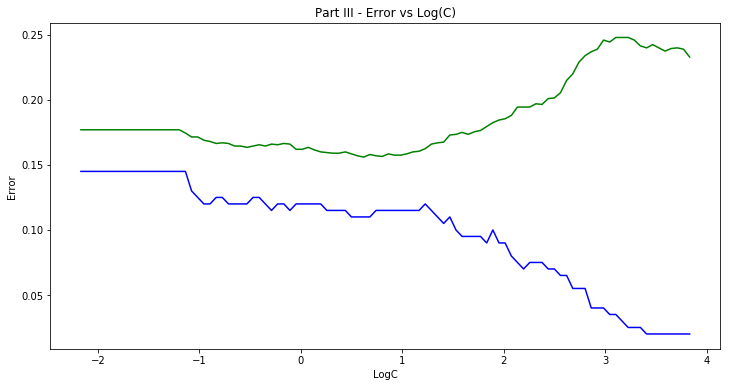

In [72]:
# create figures for plots
fig_pIII = plt.figure(figsize=(12,6))
ax_pIII = plt.gca()
ax_pIII.set_title('Part III - Error vs Log(C)')
ax_pIII.set_ylabel('Error')
ax_pIII.set_xlabel('Log(C)')
ax_pIII.set_prop_cycle('color',['blue', 'green'])

# plot test error vs log(C) and training error vs log(C)
gridData_pIII.plot(x='LogC', y='Training Error', ax=ax_pIII, legend=False)
gridData_pIII.plot(x='LogC', y='Test Error', ax=ax_pIII, legend = False)

fig_pIII.savefig('Part_III_Error_Vs__LogC.png')

## Part III Discussion

### Overview of C

The `C` parameter is a value that aids in compromising between exact classification of the training set and maximizing the decision function's margin. For small values of `C`, a larger margin is emphasized over misclassified training points. For large values of `C`, the accuracy of the decision funciton is emphasized over its margin.

### Decreasing Training Error

Because of this, it is simple to see that a large value of `C`, which focuses on training accuracy, will obviously reduce the error of the training dataset. It is essentially overfitting to the training data by finding a decision funciton that matches the data exactly.

### Decreasing then Increasing Test Error

The whole point of varying `C` is that there is an optimal tradeoff between the size of the margin and training classification accuracy. This is reflected in the shape of this curve. We see that there is an optimal point where the loss of generality from decreasing the decision function's margin outweighs the benefits of finding a more exact decision function on the training set. As stated in lecures and the textbook, this is a quadratic optimization process.

# Part IV

Generate 7 contour plots of the decision function for different values of C.
The values of log(C) should be equally spaced between log(C0) − 3 and
log(C0) + 3, inclusive. Use γ = γ0 for each value of C. Display the 7 contour
plots in a single figure in a grid pattern. (You will have to use the Python
function plt.subplot
(https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)) The
plots should highlight the decision boundaries, but not the margins. Provide
an intuitive explanation of the changes you see. (Feel free to include other
figures to support your explanations.)

## Process
```
Generate a spread of C about c0
Perform exhaustive grid search (with gamma only having a single value) to generate score data
Plot contours on subplots
```

In [41]:
# generate a spread of 7 C values
c_vals_pIV = generateLogSpread(np.log10(c0), 3, 3, 7)

# print and verify data
#print(c_vals_pIV)

In [42]:
# perform search and produce stats
gridData_pIV = gridSearch(trainSet, testSet, [gamma0], c_vals_pIV)

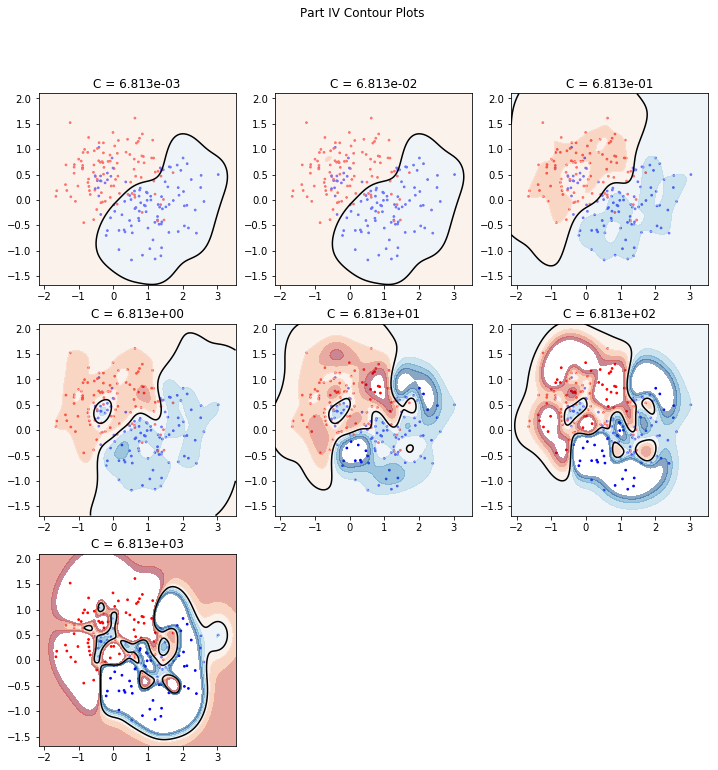

In [87]:
# create figure for plots
fig_pIV = plt.figure(figsize=(12,12))

# iterate over c_vals and add subplots
for i in range(len(c_vals_pIV)):
    # remake classifier
    clf = SVC(gamma = gamma0, C=c_vals_pIV[i])
    clf.fit(xtrain, ytrain)
    
    # create subplot and plot contours
    ax = fig_pIV.add_subplot(3,3,i+1)
    c_str_val = "%.3e" % c_vals_pIV[i]
    ax.set_title('C = ' + c_str_val)
    bonnerlib.dfContour(clf, trainSet)
    
fig_pIV.suptitle('Part IV Contour Plots')
fig_pIV.savefig('Part_IV_Contour_Plots.png')

## Part IV Discussion

As `C` increases, we see that the decision boundary becomes *tighter* around the points it bounds. This *tightness* is the result of having a smaller margin for the decision function. As `C` continues to increase, the bondary becomes more and more segmented into smaller bounding objects, meaning that it is becoming more and more fitted towards the training data (and is therefore probably losing generality)

# Part V

In this question you will fix the value of C and vary the value of γ. Generate
two curves, one of test error vs log(γ), and one of training error vs log(γ). Use
C = C0, and use 100 different values of log(γ) equally spaced between log(γ0)
– 3 and log(γ0)+3. For each value of γ you will have to retrain and retest the
SVM. Plot both curves on one set of axes, using blue for the training error and 
4
green for the test error. You should find that the training error tends to decrease
as γ increases, and that the test error first tends to decrease and then increase,
with its minimum very near γ0. Provide an intuitive explanation of this
behavior.

## Process

```
Generate a spread of gamma about gamma0
Perform an exhautive grid search (with c only having a single value) to generate score data
Plot test error vs log(gamma) and training error vs log(gamma)
Discuss Results
```

In [75]:
# generate spread of C values
gamma_vals_pV = generateLogSpread(np.log10(gamma0), 3, 3, 100)

#print and verify data
#print(gamma_vals_pV)

In [76]:
# perform search and produce stats
gridData_pV = gridSearch(trainSet, testSet, gamma_vals_pV, [c0])

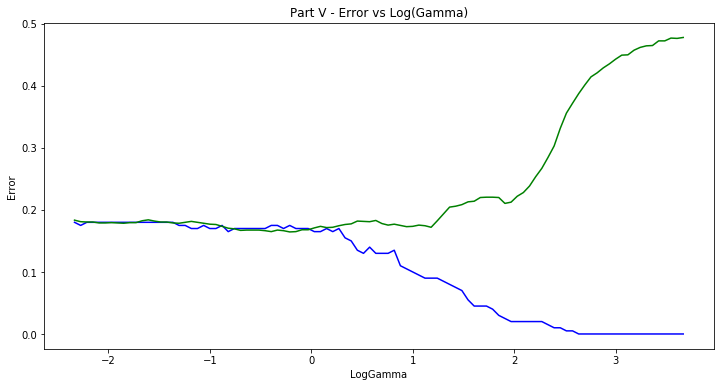

In [77]:
# create figures for plots
fig_pV = plt.figure(figsize=(12,6))
ax_pV = plt.gca()
ax_pV.set_title('Part V - Error vs Log(Gamma)')
ax_pV.set_ylabel('Error')
ax_pV.set_xlabel('Log(Gamma)')
ax_pV.set_prop_cycle('color',['blue', 'green'])

# plot test error vs log(C) and training error vs log(C)
gridData_pV.plot(x='LogGamma', y='Training Error', ax=ax_pV, legend=False)
gridData_pV.plot(x='LogGamma', y='Test Error', ax=ax_pV, legend = False)

fig_pV.savefig('Part_V_Error_Vs__LogC.png')

## Part V Discussion

### Overview of Gamma

`Gamma` is a parameter of the RBF kernel that affects the radius of influence a specific support vector has on its surroundings. `Gamma` scales with the inverse of this radius. This means that with a larger value of `Gamma`, the radius of influence decreases, and vice versa. At its extremes, a very large value of `Gamma` (one that gives a radius smaller than the average distance between points) will lead to a decision function that is extremely overfit on the training data, and a very small `Gamma` (on the same scale as the maixmum distance between two training points) will lead to poor performance because most points will fall under a single label.

### Decreasing Training Error

As with `C`, increasing `Gamma`leads to overfitting because of the reduction of influence each point has on each other. This means that it will leads to great classification of the training data, reducing its error.

### Decreasing then Increasing Test Error

Again as with `C`, there is a tradeoff between having a larger area of influence and an exact fit. When `Gamma` is initially very small, this influence is too large and leads to poor accuracy, although specifically for the plot shown above this loss of accurracy is not very large, meaning that the value of `Gamma` may not yet be smaller than the average distance between points. As `Gamma` increases, overfitting occurs as mentioned in the previous paragraph. Between these two extremes there is an optimal value for `Gamma` with the given `c0`.

# Part VI
Generate 7 contour plots of the decision function for different values ofγ. The
values of log(γ) should be equally spaced between log(γ0) − 3 and log(γ0) +
3, inclusive. Use C = C0 for each value of γ. Display the 7 contour plots in a
single figure in a grid pattern, as in part (d). Provide an intuitive explanation
of the changes you see. (Feel free to include other figures to butress your
explanation.)

## Process
```
Generate a spread of gamma about gamma0
Perform exhaustive grid search (with c only having a single value) to generate score data
Plot contours on subplots
```

In [82]:
# generate a spread of 7 C values
gamma_vals_pVI = generateLogSpread(np.log10(gamma0), 3, 3, 7)

# print and verify data
#print(gamma_vals_pVI)

In [83]:
# perform search and produce stats
gridData_pVI = gridSearch(trainSet, testSet, gamma_vals_pVI, [c0])

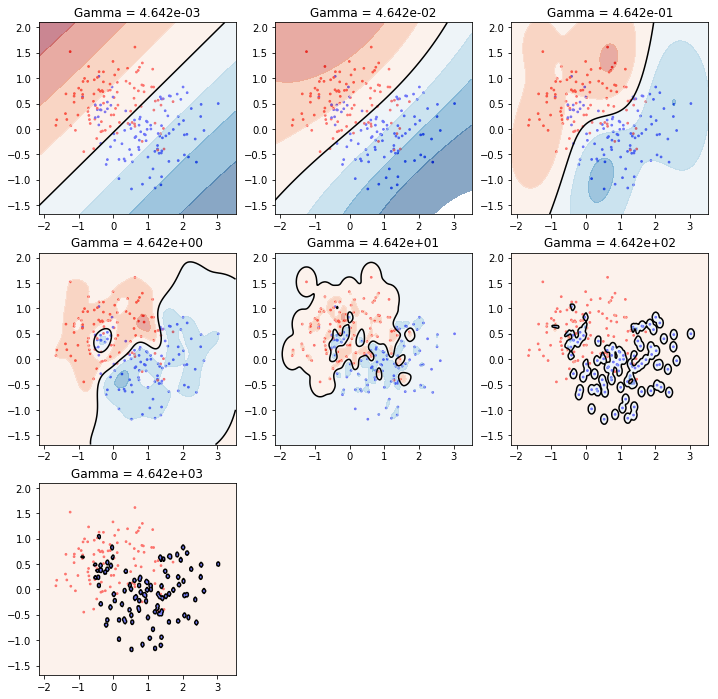

In [89]:
# create figure for plots
fig_pVI = plt.figure(figsize=(12,12))

# iterate over gamma_vals and add subplots
for i in range(len(gamma_vals_pVI)):
    # remake classifier
    clf = SVC(gamma = gamma_vals_pVI[i], C=c0)
    clf.fit(xtrain, ytrain)
    
    # create subplot and plot contours
    axVI = fig_pVI.add_subplot(3,3,i+1)
    gamma_str_val = "%.3e" % gamma_vals_pVI[i]
    axVI.set_title('Gamma = ' + gamma_str_val)
    bonnerlib.dfContour(clf, trainSet)
    
fig_pIV.suptitle('Part VI Contour Plots')
fig_pIV.savefig('Part_VI_Contour_Plots.png')

## Part VI Discussion

As stated above, small values of `Gamma` lead to poor peformance, where decision function basically divides the two highest density clusters or *centers of mass* of the two groups. As `Gamma` approaches its optimal value for the given `c0`, we see proper performance and a nonlinear bondary. But as `Gamma` increases even further, we see it concentrating solely around the specific training points because each individual point is the only support vector influencing its local boundary.